<a href="https://colab.research.google.com/github/Elma-dev/Udemy_courses_Analyses/blob/main/Udemy_courses_Analyse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
plt.figure(figsize=(13,5))

<Figure size 1300x500 with 0 Axes>

<Figure size 1300x500 with 0 Axes>

#Load Data

In [2]:
udemy_data=pd.read_csv("udemy_courses-raw.csv")

In [3]:
udemy_data.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1958,1013762,Instant Harmonica - play Leonard Cohen's Halle...,https://www.udemy.com/instant-harmonica-play-l...,True,40,100,15,14,All Levels,1.5,2016-11-20T22:46:31Z,Musical Instruments
513,513046,Learn The ABC's Of Investing And Understanding...,https://www.udemy.com/investing-101-guide/,True,20,3,0,8,All Levels,1.5,2015-06-01T22:47:06Z,Business Finance
2971,72262,1 hour jQuery,https://www.udemy.com/1-hour-jquery/,True,100,5456,133,25,Beginner Level,1.0,2013-08-03T14:20:52Z,Web Development
790,355622,Trade Forex 13 Patterns - Golden Ratios Secret...,https://www.udemy.com/forex-13-patterns-trade-...,True,200,554,63,44,All Levels,4.0,2015-01-10T13:49:22Z,Business Finance
1011,1153854,"Working Capital assessment for bankers, credit...",https://www.udemy.com/working-capital-assessme...,True,20,4,0,29,Beginner Level,7.0,2017-04-06T23:30:07Z,Business Finance


In [4]:
udemy_data=udemy_data.drop(['course_id','course_title','url'],axis=1)
udemy_data

,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance
...,...,...,...,...,...,...,...,...,...
3673,True,100,1040,14,21,All Levels,2.0,2016-06-14T17:36:46Z,Web Development
3674,True,25,306,3,42,Beginner Level,3.5,2017-03-10T22:24:30Z,Web Development
3675,True,40,513,169,48,All Levels,3.5,2015-12-30T16:41:42Z,Web Development
3676,True,50,300,31,38,All Levels,3.0,2016-08-11T19:06:15Z,Web Development


In [5]:
udemy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   is_paid              3678 non-null   bool   
 1   price                3678 non-null   int64  
 2   num_subscribers      3678 non-null   int64  
 3   num_reviews          3678 non-null   int64  
 4   num_lectures         3678 non-null   int64  
 5   level                3678 non-null   object 
 6   content_duration     3678 non-null   float64
 7   published_timestamp  3678 non-null   object 
 8   subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 233.6+ KB


# pd.to_datetime(data['columns_name'])
# data('columns').dt.day

In [6]:
#convert `published_timestamp` to date time type
udemy_data['published_timestamp']=pd.to_datetime(udemy_data['published_timestamp'])

In [7]:
udemy_data.dtypes

is_paid                               bool
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [8]:
udemy_data.published_timestamp.dt.month

0        1
1        3
2       12
3        5
4       12
        ..
3673     6
3674     3
3675    12
3676     8
3677     9
Name: published_timestamp, Length: 3678, dtype: int64

In [9]:
cat_data_name=[]
num_data_name=[]
result=['price']
for c in udemy_data.columns:
  if (udemy_data[c].dtype==object):
    cat_data_name.append(c)

In [10]:
cat_data_name=[c for c in udemy_data.columns if (udemy_data[c].dtype==object) ]


In [11]:
cat_data_name

['level', 'subject']

# Analyse of data

In [12]:
#get values of object type features
for c in udemy_data.columns:
  if udemy_data[c].dtypes==object:
    print(f'{c}:{pd.unique(udemy_data[c])}')

level:['All Levels' 'Intermediate Level' 'Beginner Level' 'Expert Level']
subject:['Business Finance' 'Graphic Design' 'Musical Instruments'
 'Web Development']


In [13]:
pd.unique(udemy_data["subject"])

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

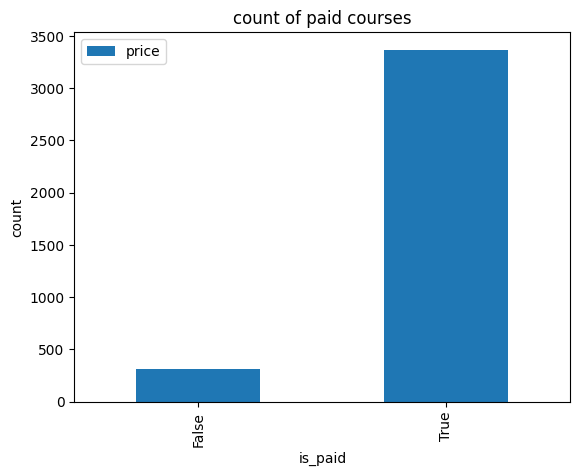

In [14]:
  # selct sum(*) from udemy_data group by 'is_paid'
  #reset_index
  #to_frame()
  udemy_data.groupby(['is_paid']).count().price.to_frame().plot.bar()
  plt.ylabel('count')
  plt.title('count of paid courses')
  plt.show()

In [15]:
is_paid_count=udemy_data.groupby(['is_paid']).count().price.to_frame().reset_index()
px.pie(data_frame=is_paid_count,names='is_paid',values='price')

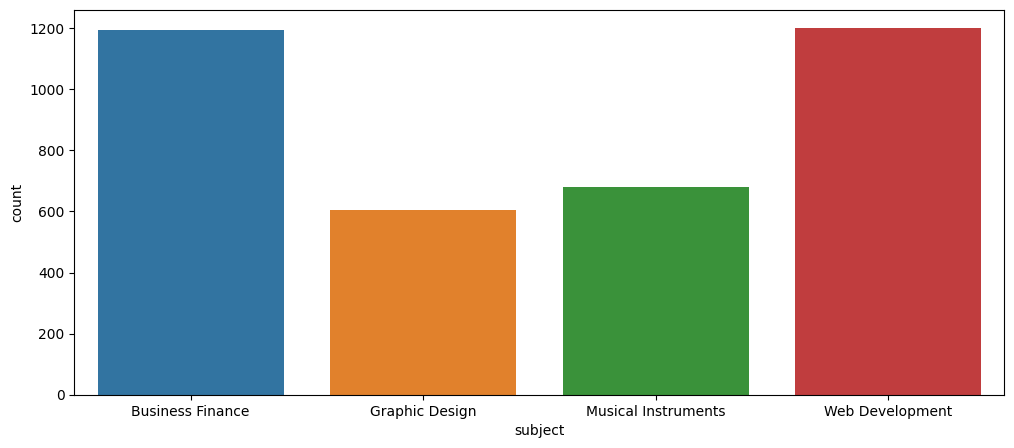

In [16]:
#change size of plot figsize(w,h)
plt.figure(figsize=(12,5))
# method1: udemy_data.groupby('subject').count().is_paid.to_frame().plot(kind='bar')
subject_count=udemy_data.groupby('subject').count().is_paid.to_frame().reset_index()
sns.barplot(data=subject_count,x='subject',y='is_paid')
plt.ylabel('count')
plt.show()

<ipython-input-17-5bf6ebd956ce>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



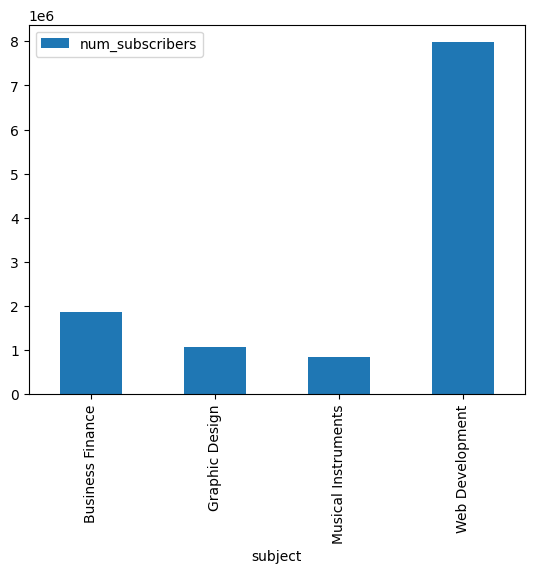

In [17]:
#number of sub in each  subject
udemy_data.groupby('subject').sum().num_subscribers.to_frame().plot.bar()
plt.show()

In [18]:
subject_is_paid=udemy_data.groupby(['subject','is_paid']).sum().num_subscribers.to_frame().reset_index()
px.bar(data_frame=subject_is_paid,x='subject',y='num_subscribers',color='is_paid')

<ipython-input-18-76829fa4cf0c>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



#**Analyse**

## <center>**Is_Paide**</center>

In [19]:
#is_paid feature
px.pie(data_frame=udemy_data.groupby('is_paid').count().reset_index(),names='is_paid',values='price',title='Paid Vs notPaid')

## <center>**Subject**</center>

In [20]:
px.bar(data_frame=udemy_data,x='subject')

In [21]:
#number of subscribers in each subject
sub_num_sub=udemy_data.groupby('subject').num_subscribers.sum().to_frame().reset_index()
px.bar(data_frame=sub_num_sub,x='subject',y='num_subscribers')

In [22]:
paid_subject=udemy_data.groupby(['is_paid','subject']).num_subscribers.sum().to_frame().reset_index()
paid_subject

,is_paid,subject,num_subscribers
0,False,Business Finance,603228
1,False,Graphic Design,284821
2,False,Musical Instruments,304735
3,False,Web Development,2382741
4,True,Business Finance,1265483
5,True,Graphic Design,778327
6,True,Musical Instruments,541954
7,True,Web Development,5597831


In [23]:
px.bar(data_frame=paid_subject,x='subject',y='num_subscribers',color='is_paid')

In [24]:
sub_level=udemy_data.groupby(['subject','level']).sum().reset_index()
sub_level
px.bar(data_frame=sub_level,x='subject',y='num_subscribers',color='level')

<ipython-input-24-69ef472b363f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [25]:
sub_rev=udemy_data.groupby('subject').num_reviews.sum().to_frame().reset_index()
px.pie(data_frame=sub_rev,names='subject',values='num_reviews')

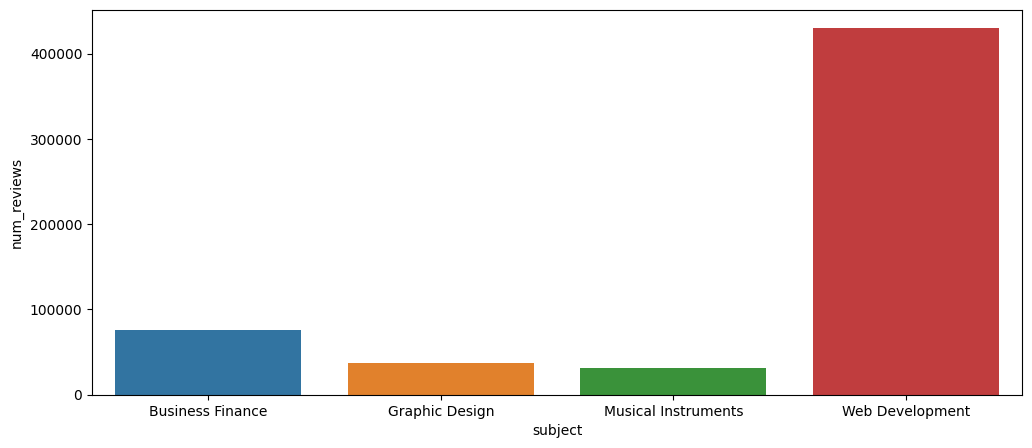

In [91]:
#number of reviews in each subject ???
plt.figure(figsize=(12,5))
sub_numR=udemy_data.groupby('subject').num_reviews.sum().to_frame().reset_index()
sns.barplot(data=sub_numR,x='subject',y='num_reviews')
plt.show()

In [76]:
date_subject=udemy_data[['subject','published_timestamp','price']]
date_subject.loc[:,'year']=date_subject.published_timestamp.dt.year

<ipython-input-76-54f5e36e4990>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [94]:
px.area(data_frame=dateVsSubject,x='year',y='price',color='subject',
        labels={
          'price':'count'
        }
)

In [112]:
subject_reward=udemy_data[udemy_data.is_paid==True].groupby('subject').price.sum().to_frame().reset_index()
px.bar(data_frame=subject_reward,x='subject',y='price',text_auto='.2s',
       labels={
           'price':'reward'
       }
)

##<center>**Years**</center>

In [137]:
#price_years
price_years=udemy_data[['price','published_timestamp','subject']]
price_years['year']=udemy_data['published_timestamp'].dt.year
priceVsYear=price_years.groupby('year').agg('sum').reset_index()
px.line(data_frame=priceVsYear,x='year',y='price',text='price',
        labels={
            'price':'reward'
            }
        )

<ipython-input-137-07410302f0e1>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-137-07410302f0e1>:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [149]:
sub_year_price=price_years.groupby(['subject','year']).agg('sum').reset_index()
px.line(data_frame=sub_year_price,color='subject',y='price',text='year')

<ipython-input-149-edeb88f1bfca>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

